## **Problem Statement**

For any organization, even the slightest chance of financial risk can not be ignored. Organizations conduct regular inspections on their expenditures and revenue to make sure that they do not fall below the critical limit. In this hackathon, you as a data scientist must use the given data to predict whether an organization is under a possible financial risk or not.

Given are 7 distinguishing factors that can provide insight into whether an organization may face a financial risk or not. Your objective as a data scientist is to build a machine learning model that can predict if an organization will fall under the risk using the given features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, log_loss

import warnings
warnings.filterwarnings('ignore')

In [85]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DL/Assignment-1/Train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DL/Assignment-1/Test.csv")

In [86]:
train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


## Exploratory Data Analysis

In [87]:
#Checking for Missing Data
train.isnull().sum() 

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

In [88]:
#Checking data types
train.dtypes

City                      int64
Location_Score          float64
Internal_Audit_Score      int64
External_Audit_Score      int64
Fin_Score                 int64
Loss_score                int64
Past_Results              int64
IsUnderRisk               int64
dtype: object

## Univariate Analysis

In [89]:
train.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


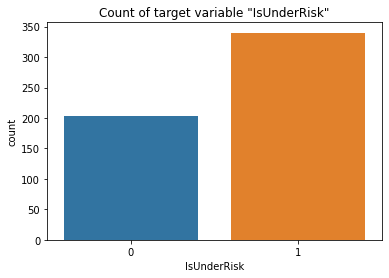

In [90]:
sns.countplot(train['IsUnderRisk'])
plt.title('Count of target variable "IsUnderRisk"')
plt.show()

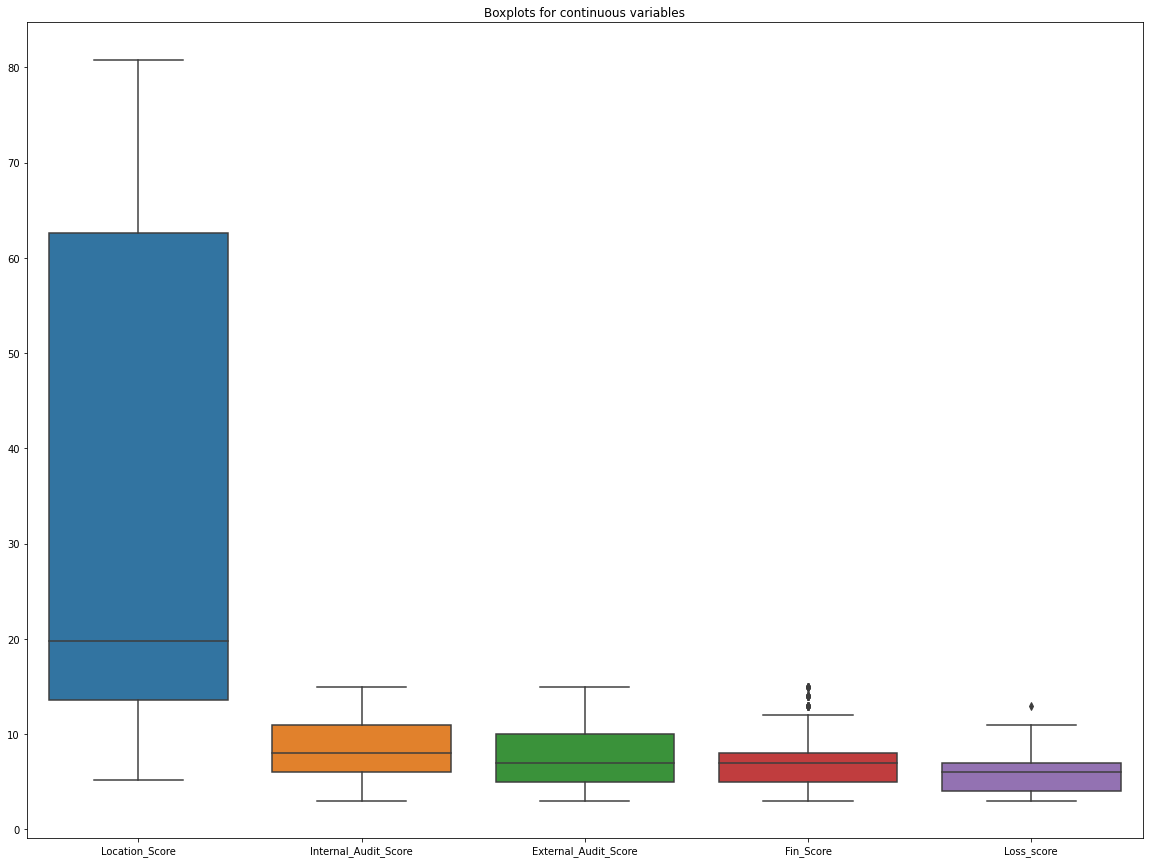

In [91]:
cols = ['Location_Score', 'Internal_Audit_Score', 'External_Audit_Score', 'Fin_Score', 'Loss_score']

plt.figure(figsize = (20,15))
sns.boxplot(data= train[cols])
plt.title('Boxplots for continuous variables')
plt.show()

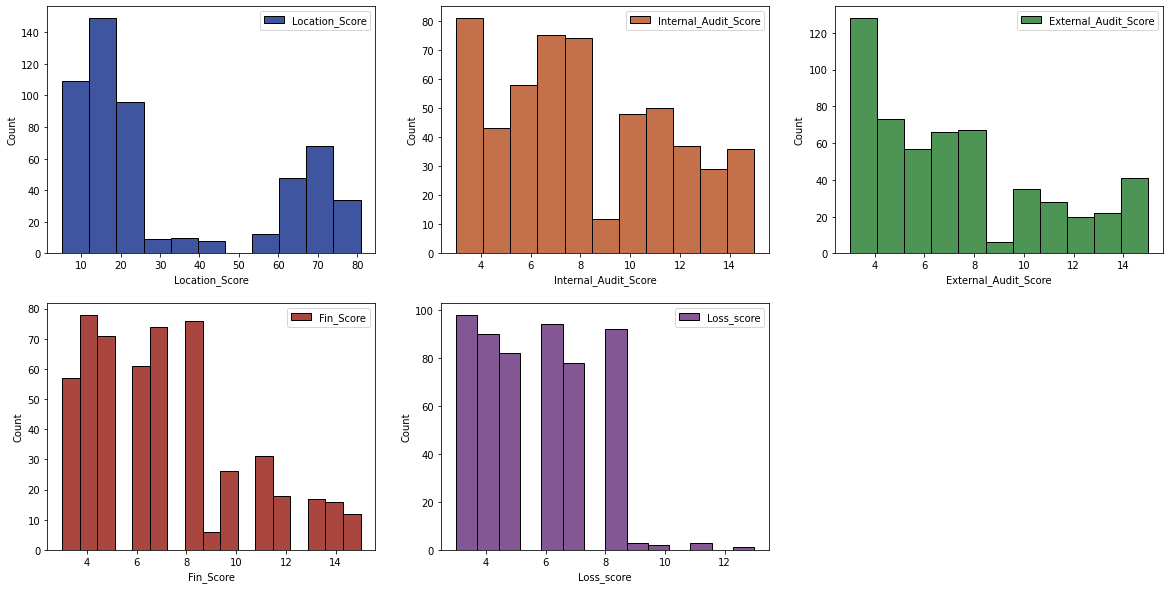

In [92]:
clr = sns.color_palette("dark")

plt.figure(figsize=(20,10))
for i,j in zip(range(1,6),cols):
    plt.subplot(2,3,i)
    sns.histplot(train[j], label=j, color=clr[i-1])
    plt.legend()
    plt.plot()

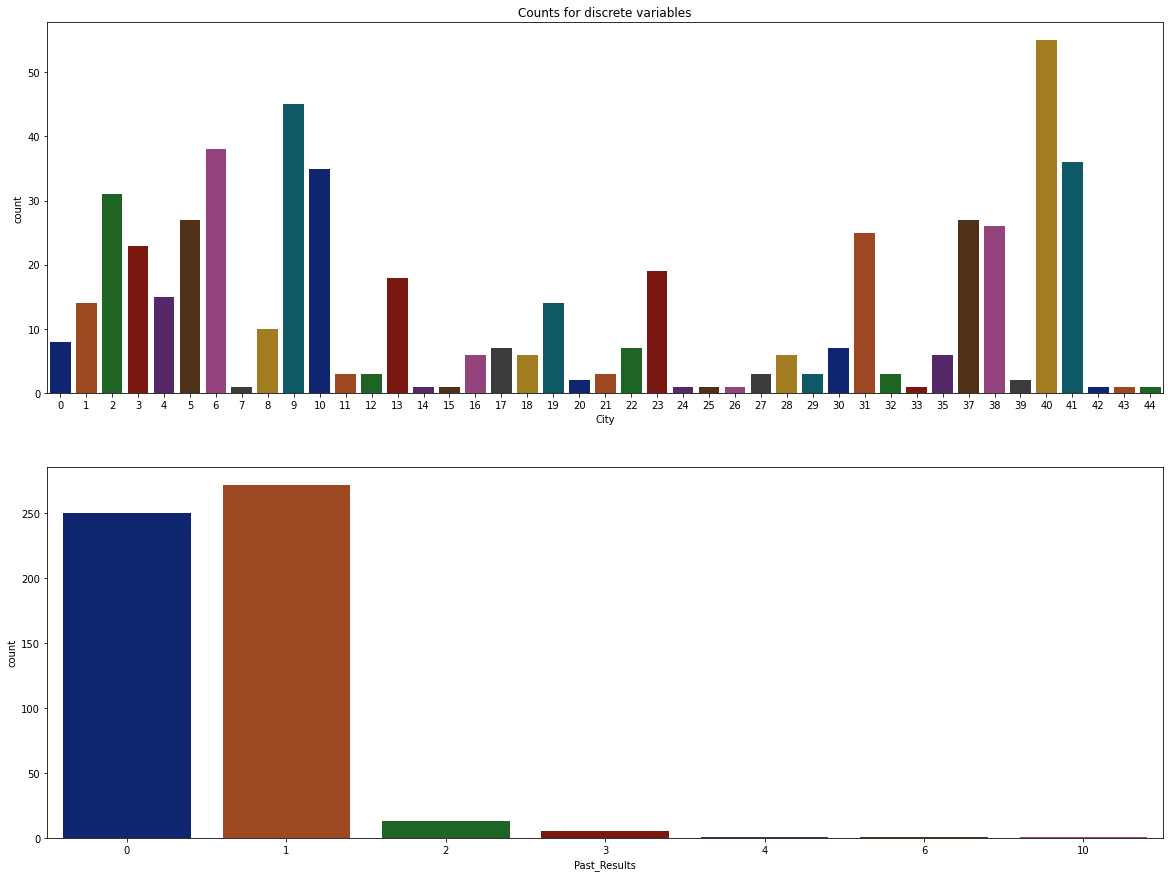

In [93]:
plt.figure(figsize = (20,15))

plt.subplot(2,1,1)
sns.countplot(train['City'], palette = 'dark')
plt.title('Counts for discrete variables')

plt.subplot(2,1,2)
sns.countplot(train['Past_Results'], palette = 'dark')


plt.show()

## Bi-Variate Analysis

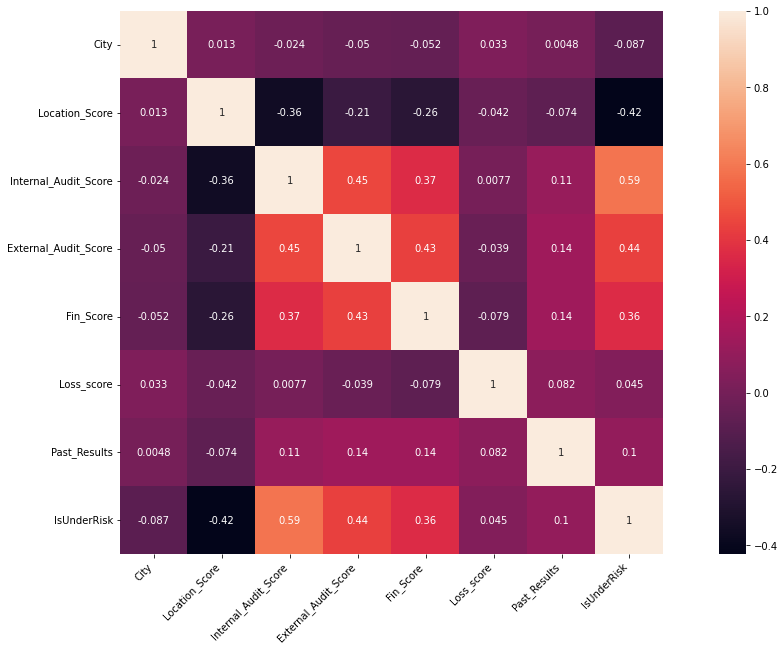

In [94]:
plt.figure(figsize=(20,10))
corrplot = sns.heatmap(train.corr(), annot = True, square = True)
corrplot.set_xticklabels(
    corrplot.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [95]:
X = train.iloc[:,:-1]
y=train.iloc[:,-1:]

In [96]:
X.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,2,8.032,14,8,3,6,0
1,31,77.730,8,3,3,8,1
2,40,59.203,3,12,11,3,0
3,12,73.080,4,5,7,6,0
4,4,15.666,13,15,6,7,2


In [97]:
y.head()

,IsUnderRisk
0,1
1,0
2,1
3,0
4,1


In [126]:
scaler = MinMaxScaler()

scaler.fit(X)
X = scaler.transform(X)

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# DNN - 1

In [128]:
model = tf.keras.Sequential()
model.add(Dense(128, input_shape=(7,),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [129]:
model.compile(optimizer ='sgd', loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [130]:
early_stop = EarlyStopping(monitor='val_loss', verbose=1, patience=2)

In [131]:
history1 = model.fit(x=X_train, y=y_train, epochs=200, 
                     validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/200
14/14 [==============================] - 1s 16ms/step - loss: 0.6968 - accuracy: 0.4816 - val_loss: 0.6917 - val_accuracy: 0.5413
Epoch 2/200
14/14 [==============================] - 0s 5ms/step - loss: 0.6905 - accuracy: 0.5323 - val_loss: 0.6848 - val_accuracy: 0.5963
Epoch 3/200
14/14 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.5899 - val_loss: 0.6782 - val_accuracy: 0.6055
Epoch 4/200
14/14 [==============================] - 0s 3ms/step - loss: 0.6776 - accuracy: 0.6152 - val_loss: 0.6725 - val_accuracy: 0.6055
Epoch 5/200
14/14 [==============================] - 0s 4ms/step - loss: 0.6714 - accuracy: 0.6359 - val_loss: 0.6675 - val_accuracy: 0.6055
Epoch 6/200
14/14 [==============================] - 0s 6ms/step - loss: 0.6649 - accuracy: 0.6313 - val_loss: 0.6624 - val_accuracy: 0.6055
Epoch 7/200
14/14 [==============================] - 0s 3ms/step - loss: 0.6580 - accuracy: 0.6359 - val_loss: 0.6576 - val_accuracy: 0.6055
Epoch 8/200


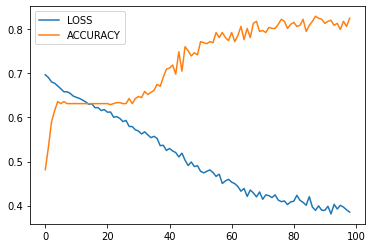

In [132]:
plt.plot(history1.history['loss'], label="LOSS")
plt.plot(history1.history['accuracy'], label="ACCURACY")
plt.legend(loc='best')
plt.show()

In [133]:
y_pred_prob = model.predict(X_test)

In [134]:
y_pred = []
for prob in y_pred_prob:
    if prob >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [135]:
print(confusion_matrix(y_test, y_pred))

[[31 12]
 [ 6 60]]


In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.72      0.77        43
           1       0.83      0.91      0.87        66

    accuracy                           0.83       109
   macro avg       0.84      0.82      0.82       109
weighted avg       0.84      0.83      0.83       109



In [138]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score is", np.round(roc_auc,2))

ROC-AUC Score is 0.82


In [139]:
#One Hot Encoding target
y1 = np.array(train['IsUnderRisk']).reshape(-1,1)

encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y1)

In [140]:
x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.20)

## DNN - 2

In [147]:
model = tf.keras.Sequential()
model.add(Dense(64, input_shape=(7,),activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [148]:
model.compile(optimizer ='sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [149]:
hist2 = model.fit(x=x_train, y=y_train, epochs=100)

Epoch 1/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.6359
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.6359
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.6359
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.6359
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.6359
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6536 - accuracy: 0.6359
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6490 - accuracy: 0.6359
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6444 - accuracy: 0.6359
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6401 - accuracy: 0.6359
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.6359
Epoch 11/

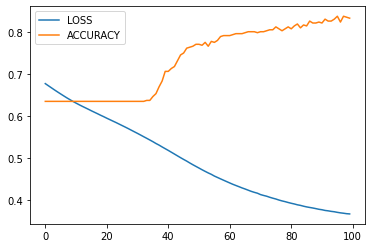

In [150]:
plt.plot(range(100), hist2.history['loss'], label="LOSS")
plt.plot(range(100), hist2.history['accuracy'], label="ACCURACY")
plt.legend(loc='best')
plt.show()

In [151]:
y_pred = model.predict(x_test)

In [152]:
ll = log_loss(y_test, y_pred)
print("Log-Loss Error for the DNN model-2 is", np.round(ll,2))

Log-Loss Error for the DNN model-2 is 0.46
